# Dealing with complexity: Motor Trend Car Road Tests

This dataset consists of 32 items with 11 attributes:

* mpg Miles/(US) gallon
* cyl Number of cylinders
* disp Displacement (cu.in.)
* hp Gross horsepower
* drat Rear axle ratio
* wt Weight (1000 lbs)
* qsec 1/4 mile time
* vs Engine (0 = V-shaped, 1 = straight)
* am Transmission (0 = automatic, 1 = manual)
* gear Number of forward gears
* carb Number of carburetors

Importing libraries and loading data:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(context='talk', style="whitegrid", rc={'figure.figsize':[10,10]})

data = pd.read_csv('data/mtcars.csv')
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Lets see how attributes are distributed:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


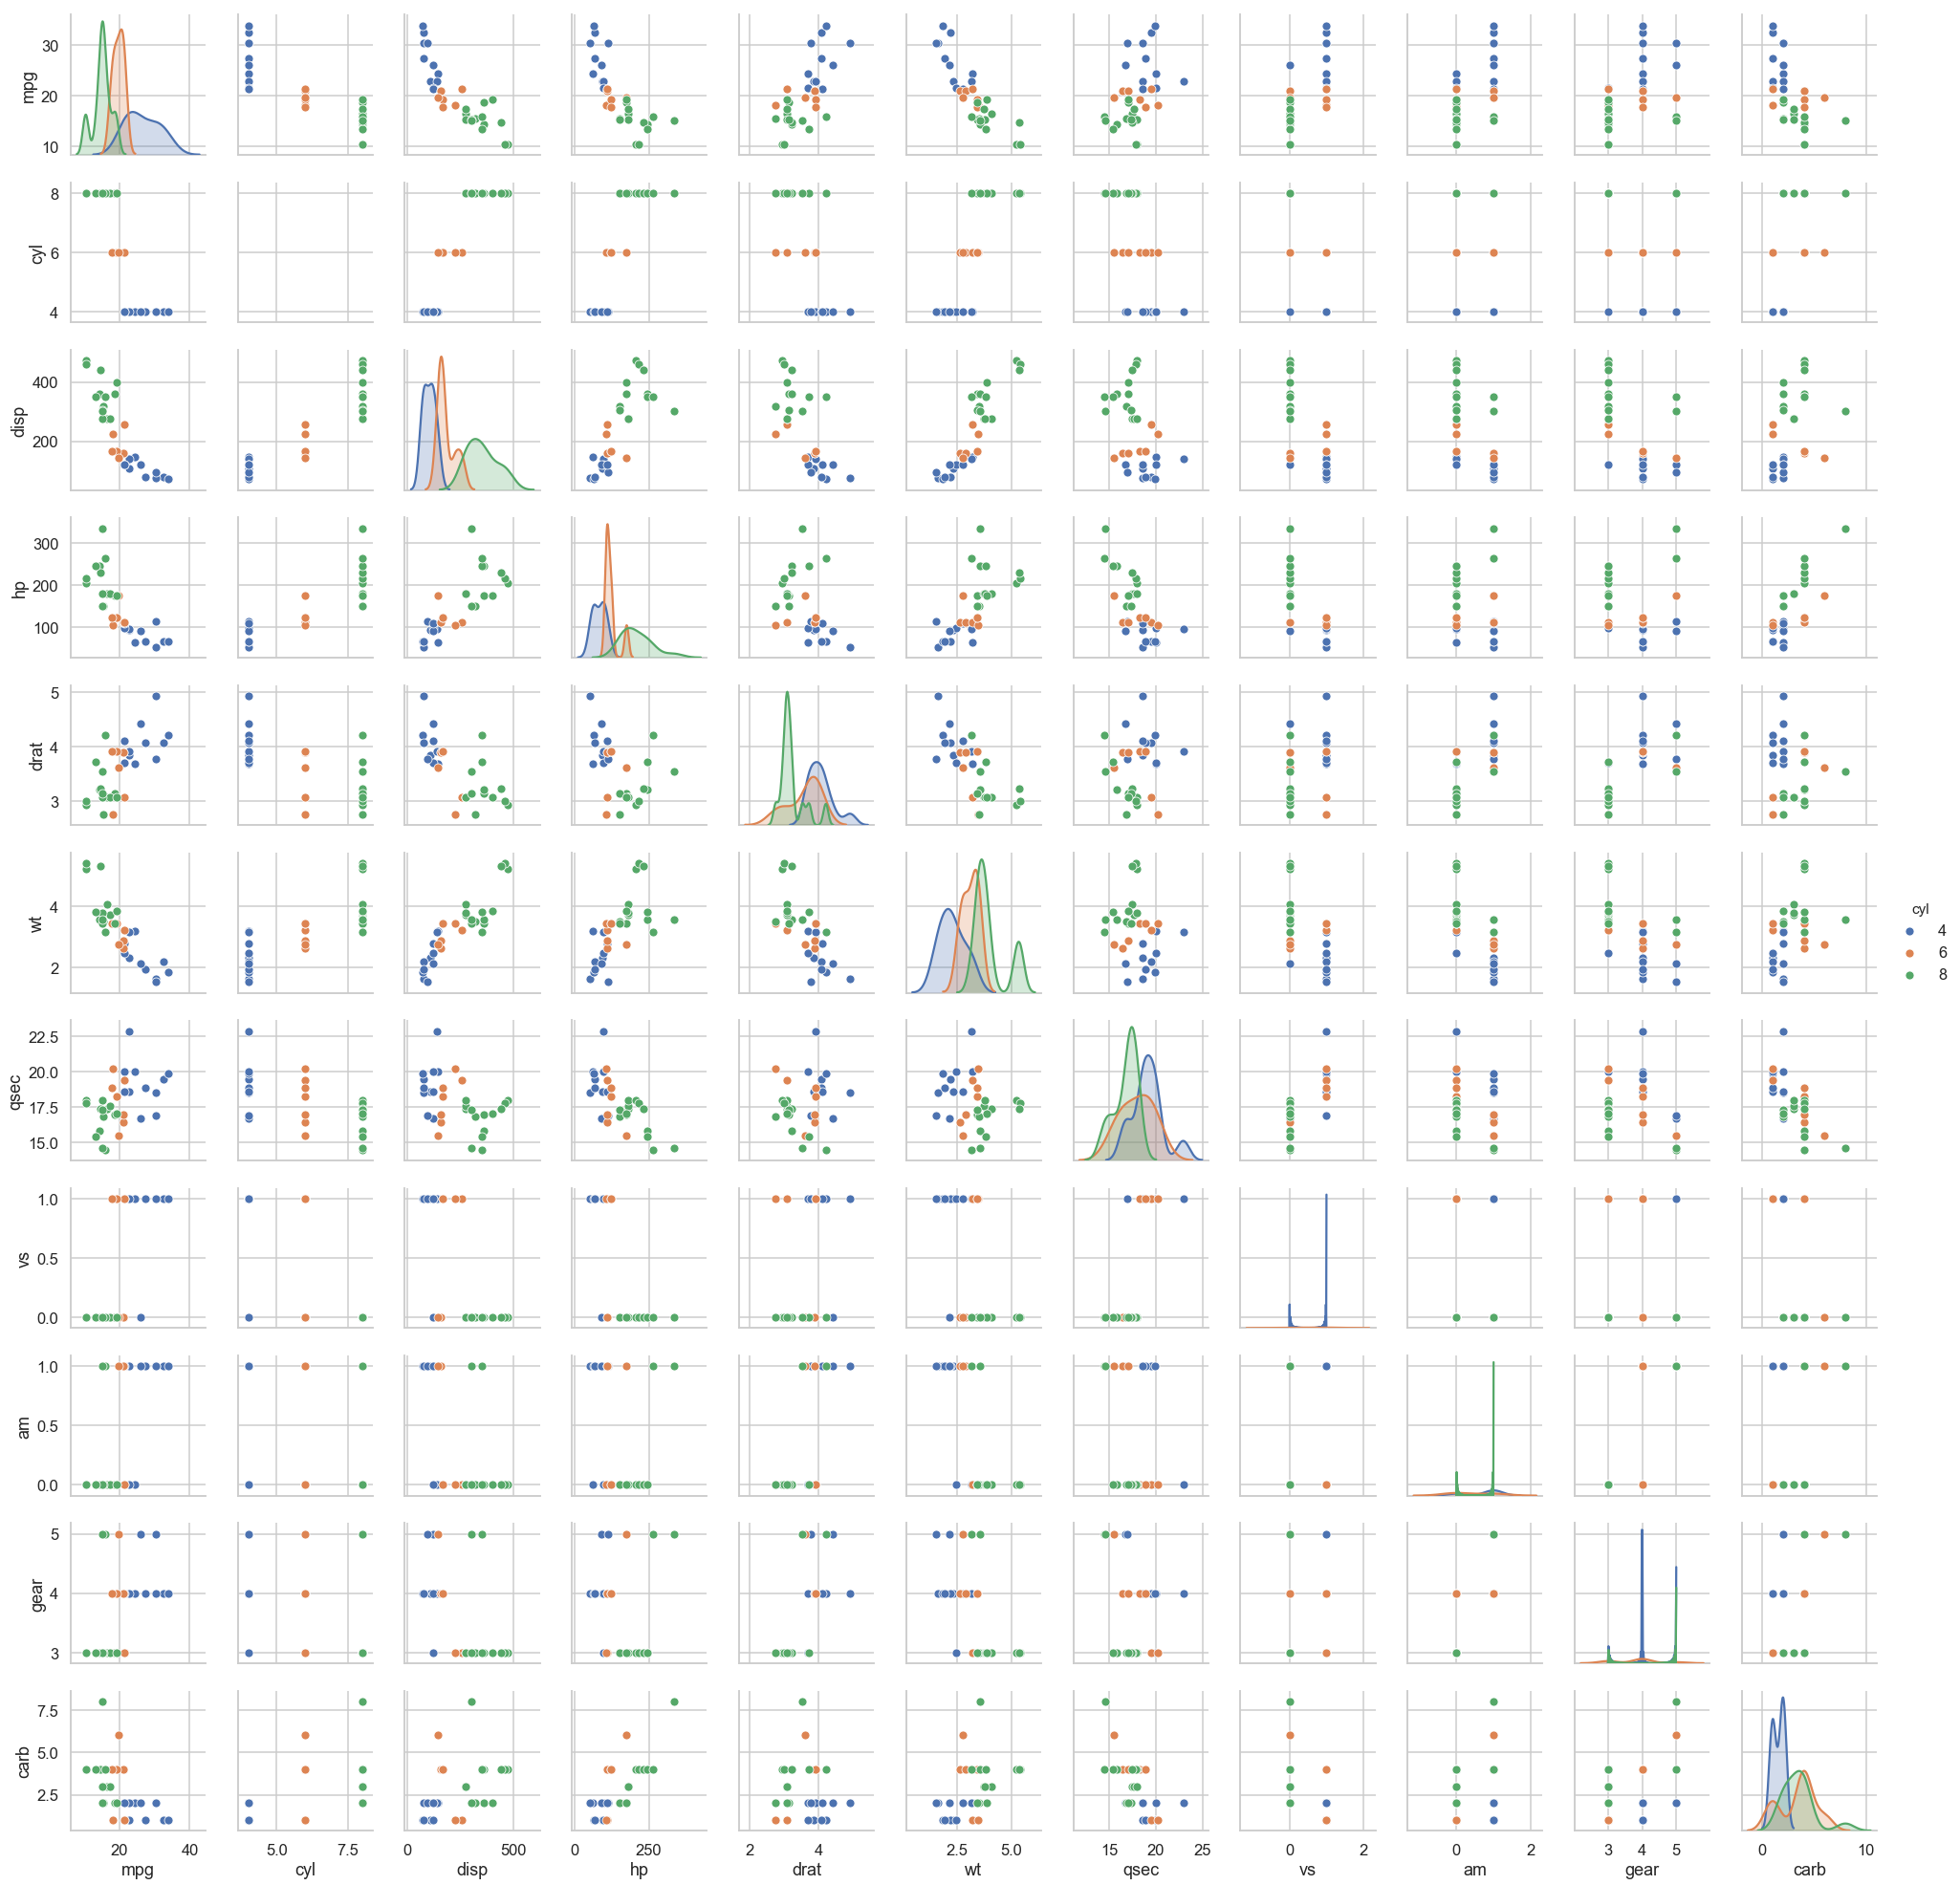

In [2]:
sns.pairplot(data, hue="cyl")

## Dimensionality Reduction: PCA

We will use [skilearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to apply PCA to data:

In [3]:
from sklearn.preprocessing import StandardScaler

features = data.copy()
features = features.set_index('model')
labels = features.pop('cyl')
norm_features = StandardScaler().fit_transform(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(norm_features)
pca_data = pd.DataFrame(data = pca_features
             , columns = ['pc1', 'pc2'])
pca_data = pca_data.set_index(features.index)
pca_data['cyl'] = labels
pca_data.head()

,pc1,pc2,cyl
model,,,
Mazda RX4,0.694947,1.718889,6
Mazda RX4 Wag,0.660037,1.535017,6
Datsun 710,2.493739,-0.173448,4
Hornet 4 Drive,0.259482,-2.370693,6
Hornet Sportabout,-1.715292,-0.747919,8


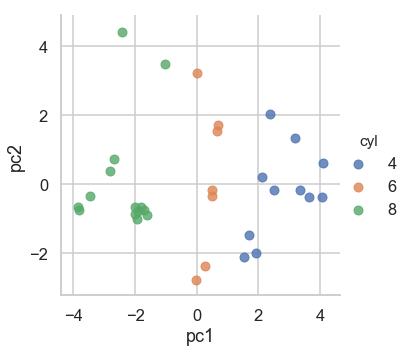

In [5]:
sns.lmplot('pc1','pc2' ,pca_data, hue='cyl', fit_reg=False)

In [6]:
pca_table = pd.DataFrame(data=pca.components_, columns=features.columns, index=['pc1', 'pc2'])
pca_table.head()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
pc1,0.393303,-0.396837,-0.352171,0.32004,-0.378678,0.205271,0.323958,0.259873,0.226786,-0.227892
pc2,0.002673,-0.036747,0.260648,0.26507,-0.129871,-0.469488,-0.241531,0.421483,0.456633,0.422681


## Clustered heatmap

We see how to create clustered heatmap with [clustermap()](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap) function.

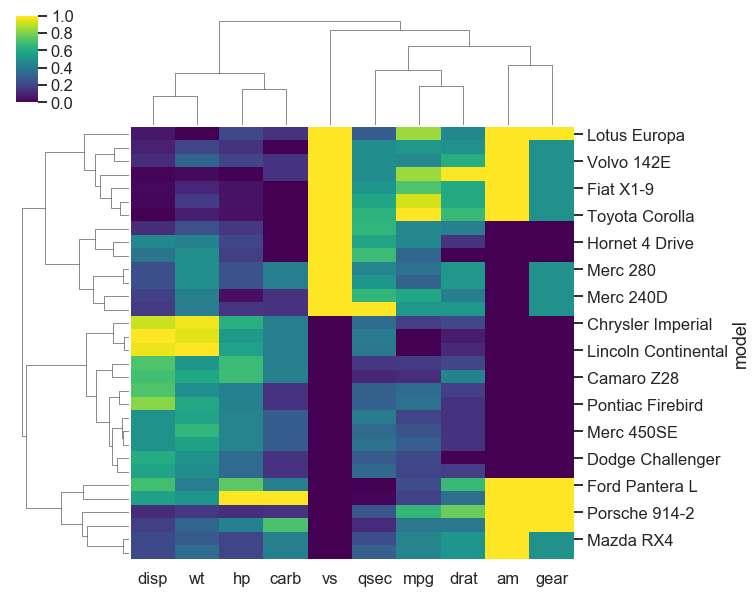

In [7]:
sns.clustermap(features, cmap='viridis', standard_scale=1)